# Fourier Series Smoothing: Averages and Standard Deviations

This is primarily for plotting purposes and for an overall validation and check of data.

Also compare the historical observed to the future projected for each basin.

## Imports and Parameters

In [1]:
%matplotlib inline

In [2]:
import os
import pickle
from IPython.display import display, HTML
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
IN_DIR1 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\Processed_Historical\OtherWeather'
IN_DIR2 = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\CombinedFuture\OtherWeather'
OUT_DIR = r'C:\Users\nmartin\Documents\EAA_HCP\Data\SwRI_Processed\CombinedFuture\OtherWeather'

In [4]:
SM_NUM = 5    # start truncation; low pass of first 5 frequencies

In [5]:
OUT_COLS = ['Tmax_C', 'Tmean_C', 'Tmin_C',]

## Historical Observations

In [6]:
HO_Wet_Ave_Dict = dict()
HO_Dry_Ave_Dict = dict()
HO_Wet_Std_Dict = dict()
HO_Dry_Std_Dict = dict()

In [7]:
InFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeathWet_Ave_1991-2020_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWAveDict = pickle.load( IF )
# end with

In [8]:
InFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeathDry_Ave_1991-2020_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDAveDict = pickle.load( IF )
# end with

In [9]:
InFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeathWet_Std_1991-2020_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWStdDict = pickle.load( IF )
# end with

In [10]:
InFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeathDry_Std_1991-2020_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDStdDict = pickle.load( IF )
# end with

In [11]:
BAS_KEYS = sorted( DoYWAveDict.keys() )

Loop through basins, make new DataFrames, and add to Dictionaries

In [12]:
for bas in BAS_KEYS:
    WAveDF = DoYWAveDict[bas]
    WAveDF.interpolate( inplace=True )
    DAveDF = DoYDAveDict[bas]
    DAveDF.interpolate( inplace=True )
    WStdDF = DoYWStdDict[bas]
    WStdDF.interpolate( inplace=True )
    DStdDF = DoYDStdDict[bas]
    DStdDF.interpolate( inplace=True )
    # wet average
    #    average max
    rft = np.fft.rfft(WAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetAveSmoothDF = pd.DataFrame( index=WAveDF.index[:366], data=DataDict )
    HO_Wet_Ave_Dict[bas] = WetAveSmoothDF
    # wet standard dev
    #    average max
    rft = np.fft.rfft(WStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetStdSmoothDF = pd.DataFrame( index=WStdDF.index[:366], data=DataDict )
    HO_Wet_Std_Dict[bas] = WetStdSmoothDF
    # dry average
    #    average max
    rft = np.fft.rfft(DAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryAveSmoothDF = pd.DataFrame( index=DAveDF.index[:366], data=DataDict )
    HO_Dry_Ave_Dict[bas] = DryAveSmoothDF
    # dry standard dev
    #    average max
    rft = np.fft.rfft(DStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryStdSmoothDF = pd.DataFrame( index=DStdDF.index[:366], data=DataDict )
    HO_Dry_Std_Dict[bas] = DryStdSmoothDF
# end basin for

Serialize for future use

In [13]:
OutFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeath_Smooth_WetAve_1981-2010_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( HO_Wet_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeath_Smooth_DryAve_1981-2010_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( HO_Dry_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeath_Smooth_WetStd_1981-2010_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( HO_Wet_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( IN_DIR1, "OWeath_Smooth_DryStd_1981-2010_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( HO_Dry_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## CN 1

In [14]:
CN1_Wet_Ave_Dict = dict()
CN1_Dry_Ave_Dict = dict()
CN1_Wet_Std_Dict = dict()
CN1_Dry_Std_Dict = dict()

In [15]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathWet_Ave_2021-2050_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWAveDict = pickle.load( IF )
# end with

In [16]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathDry_Ave_2021-2050_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDAveDict = pickle.load( IF )
# end with

In [17]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathWet_Std_2021-2050_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWStdDict = pickle.load( IF )
# end with

In [18]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathDry_Std_2021-2050_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDStdDict = pickle.load( IF )
# end with

In [19]:
for bas in BAS_KEYS:
    WAveDF = DoYWAveDict[bas]
    WAveDF.interpolate( inplace=True )
    DAveDF = DoYDAveDict[bas]
    DAveDF.interpolate( inplace=True )
    WStdDF = DoYWStdDict[bas]
    WStdDF.interpolate( inplace=True )
    DStdDF = DoYDStdDict[bas]
    DStdDF.interpolate( inplace=True )
    # wet average
    #    average max
    rft = np.fft.rfft(WAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetAveSmoothDF = pd.DataFrame( index=WAveDF.index[:366], data=DataDict )
    CN1_Wet_Ave_Dict[bas] = WetAveSmoothDF
    # wet standard dev
    #    average max
    rft = np.fft.rfft(WStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetStdSmoothDF = pd.DataFrame( index=WStdDF.index[:366], data=DataDict )
    CN1_Wet_Std_Dict[bas] = WetStdSmoothDF
    # dry average
    #    average max
    rft = np.fft.rfft(DAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryAveSmoothDF = pd.DataFrame( index=DAveDF.index[:366], data=DataDict )
    CN1_Dry_Ave_Dict[bas] = DryAveSmoothDF
    # dry standard dev
    #    average max
    rft = np.fft.rfft(DStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryStdSmoothDF = pd.DataFrame( index=DStdDF.index[:366], data=DataDict )
    CN1_Dry_Std_Dict[bas] = DryStdSmoothDF
# end basin for

In [20]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_WetAve_2021-2050_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN1_Wet_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_DryAve_2021-2050_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN1_Dry_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_WetStd_2021-2050_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN1_Wet_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_DryStd_2021-2050_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN1_Dry_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## CN 2

In [21]:
CN2_Wet_Ave_Dict = dict()
CN2_Dry_Ave_Dict = dict()
CN2_Wet_Std_Dict = dict()
CN2_Dry_Std_Dict = dict()

In [22]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathWet_Ave_2051-2080_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWAveDict = pickle.load( IF )
# end with

In [23]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathDry_Ave_2051-2080_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDAveDict = pickle.load( IF )
# end with

In [24]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathWet_Std_2051-2080_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWStdDict = pickle.load( IF )
# end with

In [25]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathDry_Std_2051-2080_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDStdDict = pickle.load( IF )
# end with

In [26]:
for bas in BAS_KEYS:
    WAveDF = DoYWAveDict[bas]
    WAveDF.interpolate( inplace=True )
    DAveDF = DoYDAveDict[bas]
    DAveDF.interpolate( inplace=True )
    WStdDF = DoYWStdDict[bas]
    WStdDF.interpolate( inplace=True )
    DStdDF = DoYDStdDict[bas]
    DStdDF.interpolate( inplace=True )
    # wet average
    #    average max
    rft = np.fft.rfft(WAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetAveSmoothDF = pd.DataFrame( index=WAveDF.index[:366], data=DataDict )
    CN2_Wet_Ave_Dict[bas] = WetAveSmoothDF
    # wet standard dev
    #    average max
    rft = np.fft.rfft(WStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetStdSmoothDF = pd.DataFrame( index=WStdDF.index[:366], data=DataDict )
    CN2_Wet_Std_Dict[bas] = WetStdSmoothDF
    # dry average
    #    average max
    rft = np.fft.rfft(DAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryAveSmoothDF = pd.DataFrame( index=DAveDF.index[:366], data=DataDict )
    CN2_Dry_Ave_Dict[bas] = DryAveSmoothDF
    # dry standard dev
    #    average max
    rft = np.fft.rfft(DStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryStdSmoothDF = pd.DataFrame( index=DStdDF.index[:366], data=DataDict )
    CN2_Dry_Std_Dict[bas] = DryStdSmoothDF
# end basin for

In [27]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_WetAve_2051-2080_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN2_Wet_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_DryAve_2051-2080_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN2_Dry_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_WetStd_2051-2080_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN2_Wet_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_DryStd_2051-2080_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CN2_Dry_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Custom CN

In [28]:
CCN_Wet_Ave_Dict = dict()
CCN_Dry_Ave_Dict = dict()
CCN_Wet_Std_Dict = dict()
CCN_Dry_Std_Dict = dict()

In [29]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathWet_Ave_2031-2060_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWAveDict = pickle.load( IF )
# end with

In [30]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathDry_Ave_2031-2060_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDAveDict = pickle.load( IF )
# end with

In [31]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathWet_Std_2031-2060_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYWStdDict = pickle.load( IF )
# end with

In [32]:
InFiler = os.path.normpath( os.path.join( IN_DIR2, "OWeathDry_Std_2031-2060_DFDict.pkl" ) )
with open( InFiler, 'rb' ) as IF:
    DoYDStdDict = pickle.load( IF )
# end with

In [33]:
for bas in BAS_KEYS:
    WAveDF = DoYWAveDict[bas]
    WAveDF.interpolate( inplace=True )
    DAveDF = DoYDAveDict[bas]
    DAveDF.interpolate( inplace=True )
    WStdDF = DoYWStdDict[bas]
    WStdDF.interpolate( inplace=True )
    DStdDF = DoYDStdDict[bas]
    DStdDF.interpolate( inplace=True )
    # wet average
    #    average max
    rft = np.fft.rfft(WAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetAveSmoothDF = pd.DataFrame( index=WAveDF.index[:366], data=DataDict )
    CCN_Wet_Ave_Dict[bas] = WetAveSmoothDF
    # wet standard dev
    #    average max
    rft = np.fft.rfft(WStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(WStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(WStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    WetStdSmoothDF = pd.DataFrame( index=WStdDF.index[:366], data=DataDict )
    CCN_Wet_Std_Dict[bas] = WetStdSmoothDF
    # dry average
    #    average max
    rft = np.fft.rfft(DAveDF["AMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DAveDF["AAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DAveDF["AMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryAveSmoothDF = pd.DataFrame( index=DAveDF.index[:366], data=DataDict )
    CCN_Dry_Ave_Dict[bas] = DryAveSmoothDF
    # dry standard dev
    #    average max
    rft = np.fft.rfft(DStdDF["SDMaxT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmax_smooth = np.fft.irfft(rft)
    #     average mean
    rft = np.fft.rfft(DStdDF["SDAveT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tave_smooth = np.fft.irfft(rft)
    #     average min
    rft = np.fft.rfft(DStdDF["SDMinT_C"].loc[:366].to_numpy(dtype=np.float32))
    rft[SM_NUM:] = 0.0
    tmin_smooth = np.fft.irfft(rft)
    DataDict = { OUT_COLS[0] : tmax_smooth,
                 OUT_COLS[1] : tave_smooth,
                 OUT_COLS[2] : tmin_smooth, }
    DryStdSmoothDF = pd.DataFrame( index=DStdDF.index[:366], data=DataDict )
    CCN_Dry_Std_Dict[bas] = DryStdSmoothDF
# end basin for

In [34]:
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_WetAve_2031-2060_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CCN_Wet_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_DryAve_2031-2060_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CCN_Dry_Ave_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_WetStd_2031-2060_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CCN_Wet_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with
OutFiler = os.path.normpath( os.path.join( OUT_DIR, "OWeath_Smooth_DryStd_2031-2060_DictDF.pkl" ) )
with open( OutFiler, 'wb' ) as OF:
    pickle.dump( CCN_Dry_Std_Dict, OF, protocol=pickle.HIGHEST_PROTOCOL )
# end with

## Plots

### Blanco

In [35]:
bCnt = 0

In [36]:
bas = BAS_KEYS[bCnt]
bas

'Blanco'

In [37]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [38]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [39]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [40]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

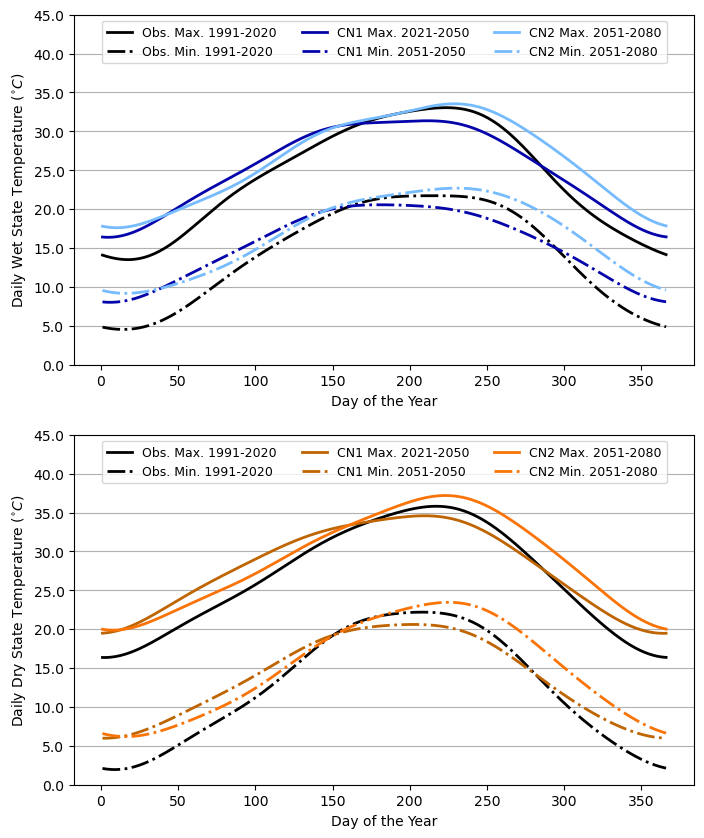

In [41]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Cibolo

In [42]:
bCnt += 1

In [43]:
bas = BAS_KEYS[bCnt]
bas

'Cibolo'

In [44]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [45]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [46]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [47]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

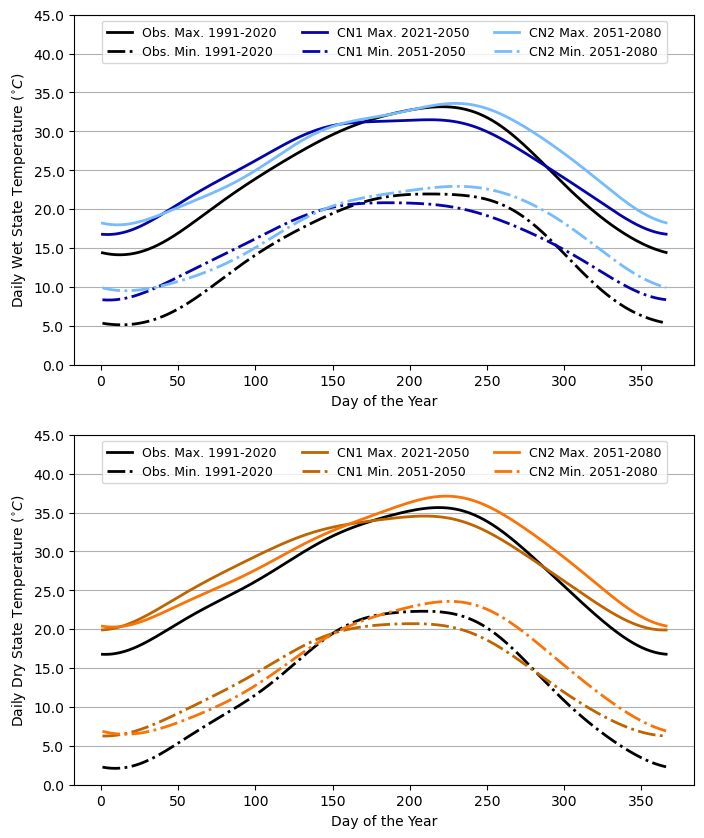

In [48]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Frio

In [49]:
bCnt += 1

In [50]:
bas = BAS_KEYS[bCnt]
bas

'Frio'

In [51]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [52]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [53]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [54]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

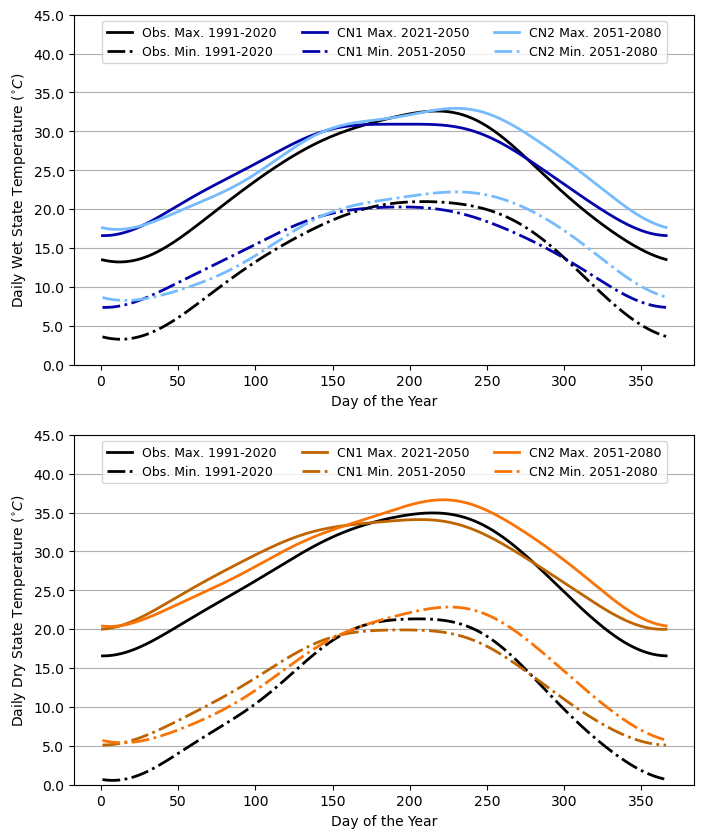

In [55]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Guadalupe

In [56]:
bCnt += 1

In [57]:
bas = BAS_KEYS[bCnt]
bas

'Guadalupe'

In [58]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [59]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [60]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [61]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

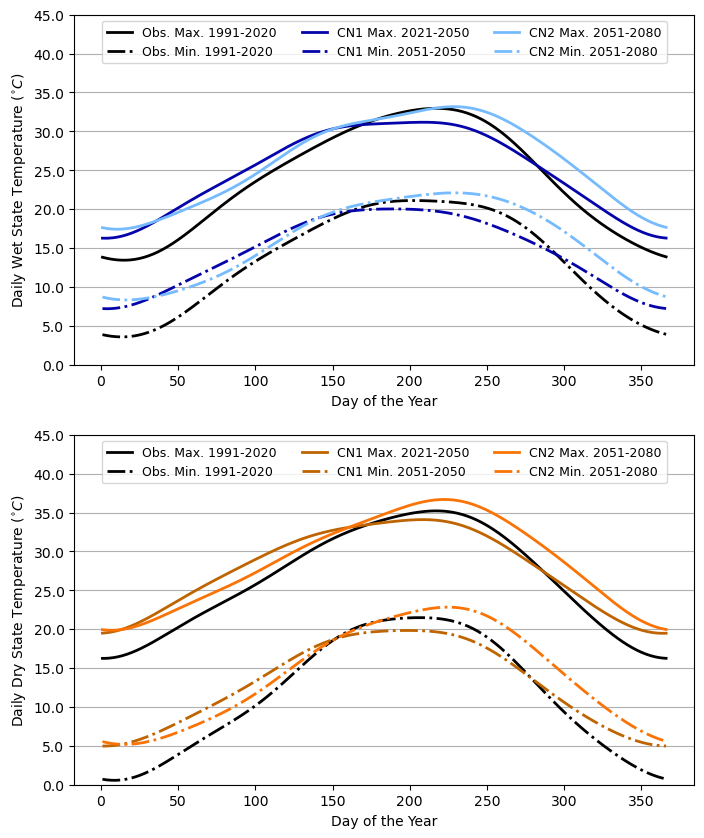

In [62]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Med-Cib

In [63]:
bCnt += 1

In [64]:
bas = BAS_KEYS[bCnt]
bas

'Med-Cib'

In [65]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [66]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [67]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [68]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

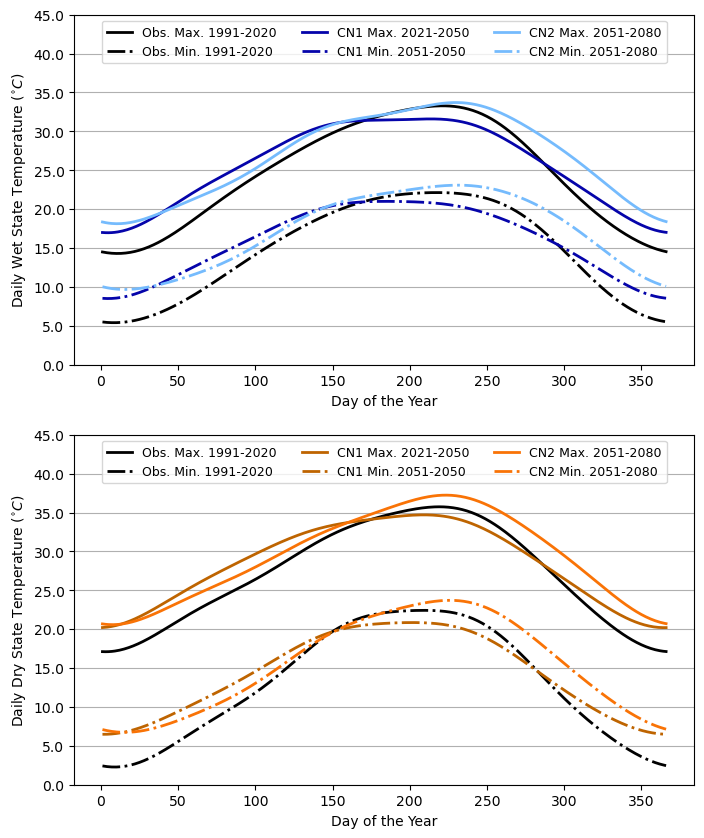

In [69]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Medina

In [70]:
bCnt += 1

In [71]:
bas = BAS_KEYS[bCnt]
bas

'Medina'

In [72]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [73]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [74]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [75]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

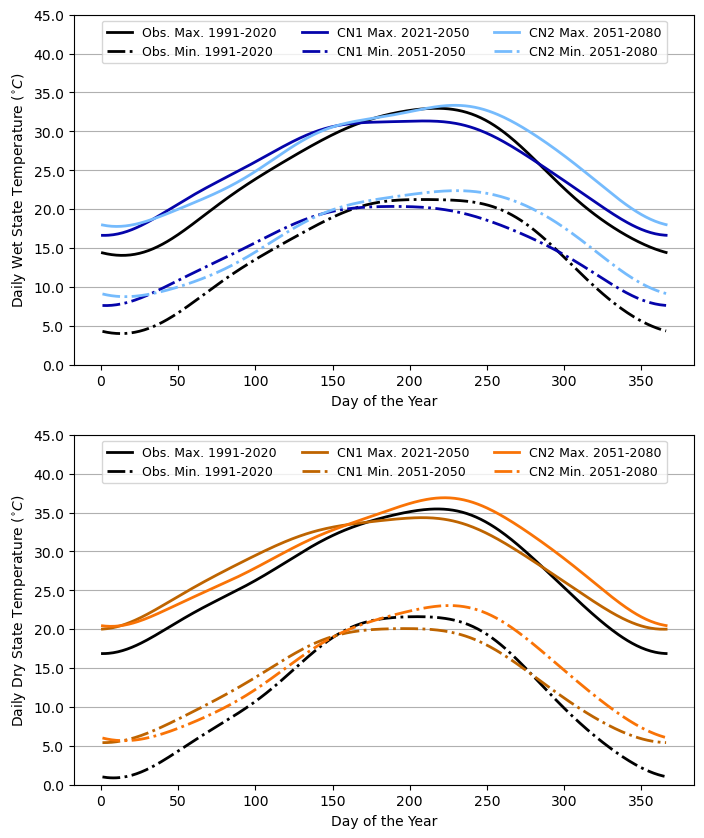

In [76]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Nueces

In [77]:
bCnt += 1

In [78]:
bas = BAS_KEYS[bCnt]
bas

'Nueces'

In [79]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [80]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [81]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [82]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

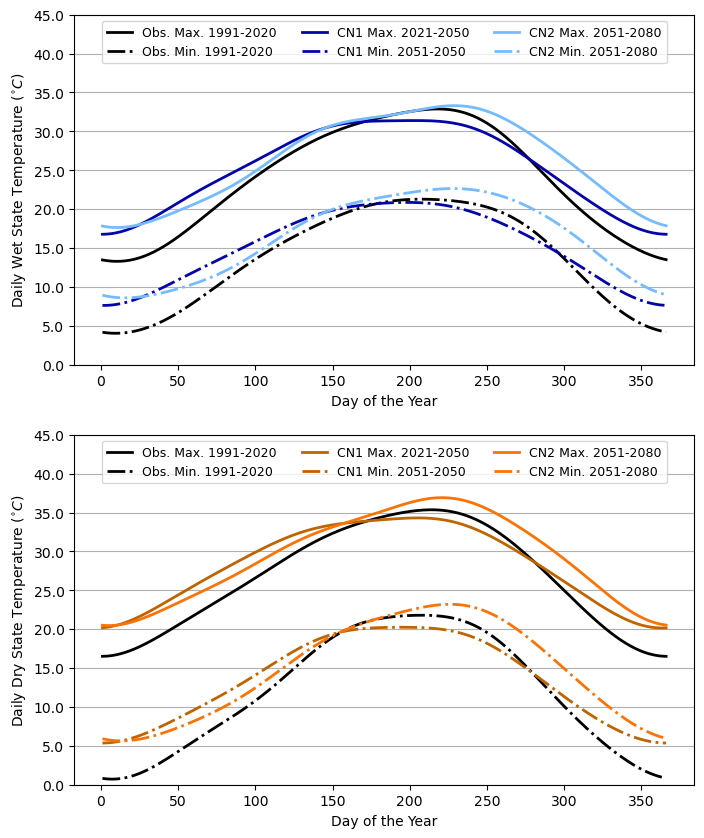

In [83]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Sab-Med

In [84]:
bCnt += 1

In [85]:
bas = BAS_KEYS[bCnt]
bas

'Sab-Med'

In [86]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [87]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [88]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [89]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

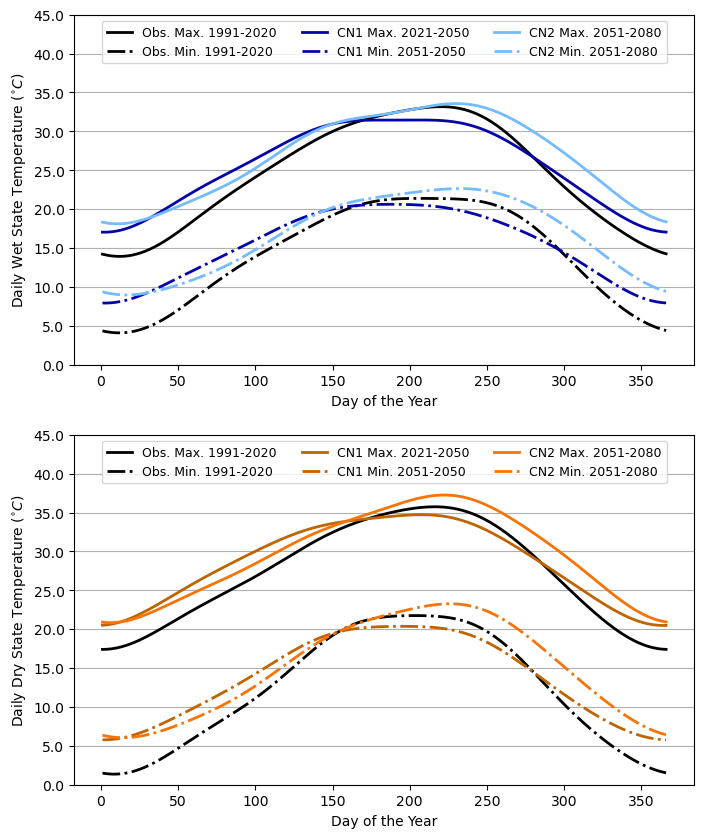

In [90]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )

### Sabinal

In [91]:
bCnt += 1

In [92]:
bas = BAS_KEYS[bCnt]
bas

'Sabinal'

In [93]:
choWetAveDF = HO_Wet_Ave_Dict[bas]
choDryAveDF = HO_Dry_Ave_Dict[bas]
choWetStdDF = HO_Wet_Std_Dict[bas]
choDryStdDF = HO_Dry_Std_Dict[bas]

In [94]:
ccn1WetAveDF = CN1_Wet_Ave_Dict[bas]
ccn1DryAveDF = CN1_Dry_Ave_Dict[bas]
ccn1WetStdDF = CN1_Wet_Std_Dict[bas]
ccn1DryStdDF = CN1_Dry_Std_Dict[bas]

In [95]:
ccn2WetAveDF = CN2_Wet_Ave_Dict[bas]
ccn2DryAveDF = CN2_Dry_Ave_Dict[bas]
ccn2WetStdDF = CN2_Wet_Std_Dict[bas]
ccn2DryStdDF = CN2_Dry_Std_Dict[bas]

In [96]:
OutSVG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.svg" % bas ) )
OutPNG = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.png" % bas ) )
OutPDF = os.path.normpath( os.path.join( OUT_DIR, "Plots", "%s_Temps_DOY_Aves.pdf" % bas ) )

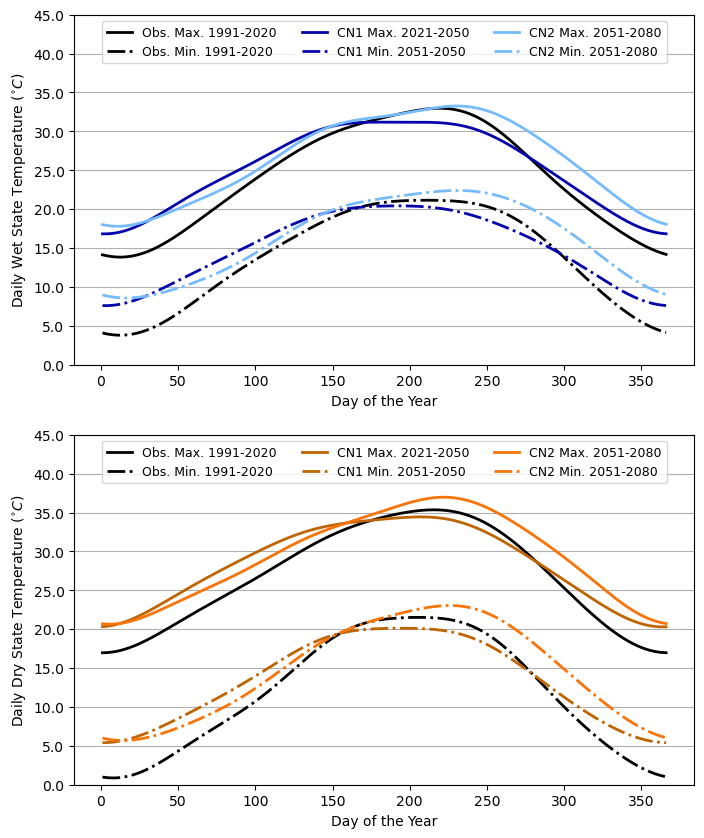

In [97]:
Fig1 = plt.figure()
Fig1.set_size_inches(8.0, 10.0)
ax11 = Fig1.add_subplot(211)
howmax, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
howmin, = ax11.plot( choWetAveDF.index, choWetAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1wmax, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[0]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1wmin, = ax11.plot( ccn1WetAveDF.index, ccn1WetAveDF[OUT_COLS[2]], color='xkcd:royal blue', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2wmax, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[0]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2wmin, = ax11.plot( ccn2WetAveDF.index, ccn2WetAveDF[OUT_COLS[2]], color='xkcd:sky blue', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax11.set_xlabel('Day of the Year', fontsize=10 )
ax11.set_ylabel('Daily Wet State Temperature ($ ^{\circ} C$)', fontsize=10)
ax11.set_ylim( (0.0, 45.0))
ax11.grid( visible=True, which='major', axis='y' )
ax11.legend( loc='upper center', ncol=3, fontsize=9 )
ax11.tick_params(axis='both', which='major', labelsize=10)
ax11.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax11.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
# plot 2
ax21 = Fig1.add_subplot(212)
hodmax, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[0]], color='xkcd:black', linewidth=2.0, 
                      linestyle='-', label='Obs. Max. 1991-2020' )
hodmin, = ax21.plot( choDryAveDF.index, choDryAveDF[OUT_COLS[2]], color='xkcd:black', linewidth=2.0, 
                     linestyle='-.', label='Obs. Min. 1991-2020' )
cn1dmax, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[0]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-', label='CN1 Max. 2021-2050' )
cn1dmin, = ax21.plot( ccn1DryAveDF.index, ccn1DryAveDF[OUT_COLS[2]], color='xkcd:orange brown', linewidth=2.0, 
                      linestyle='-.', label='CN1 Min. 2051-2050' ) 
cn2dmax, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[0]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-', label='CN2 Max. 2051-2080' )
cn2dmin, = ax21.plot( ccn2DryAveDF.index, ccn2DryAveDF[OUT_COLS[2]], color='xkcd:orange', linewidth=2.0, 
                      linestyle='-.', label='CN2 Min. 2051-2080' )
ax21.set_ylim( (0.0, 45.0))
ax21.set_xlabel('Day of the Year', fontsize=10 )
ax21.set_ylabel('Daily Dry State Temperature ($ ^{\circ} C$)', fontsize=10)
ax21.grid( visible=True, which='major', axis='y' )
ax21.legend( loc='upper center', ncol=3, fontsize=9 )
ax21.tick_params(axis='both', which='major', labelsize=10)
ax21.yaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.1f}" ) )
ax21.xaxis.set_major_formatter( mpl.ticker.StrMethodFormatter( "{x:,.0f}" ) )
Fig1.savefig( OutSVG, dpi=600.0 )
Fig1.savefig( OutPNG, dpi=600.0 )
Fig1.savefig( OutPDF, dpi=600.0 )